一 简答题  
 1. 类的属性和对象的属性有什么区别?  
 RE:类的属性是该类及其所有实例共用，对象的属性仅限该对象自己使用 
 
 2. 什么是绑定到对象的方法，如何定义，如何调用，给谁用？有什么特性  
 RE:在类内部定义的函数，当类被实例化后，函数会绑定到对象上。通过该实例+'.'+'函数'使用。
 3. 什么是多态，多态有哪些优点，可以在哪些场景使用多态  
 RE:不同类型对象抽象出共同特征形成一个类，其它子类继续该公共类，不同子类实例化后，将此实例作为变量传入方法中，自动识别该实例为哪个子类。
    比如模拟不同动物的特征，果汁加工，交通工具鸣笛=
 4. 简述一下Python中鸭子类型，举出一个简单实例(代码实现)   
 RE:
 5. 什么是封装，封装有哪些优点  
 RE:封装即把某些属性封装到类中，不允许外部直接访问。可以避免属性被外部直接访问并修改。  
 6. 教程中封装那一节的小问题  
 RE: 因为属性在外部不能访问，在程序编译过程中内部函数已经完成变形工作，故可以访问

二 代码优化  
  
如下示例, 在没有学习类这个概念时，数据与功能是分离的,请用面向对象的形式优化以下代码
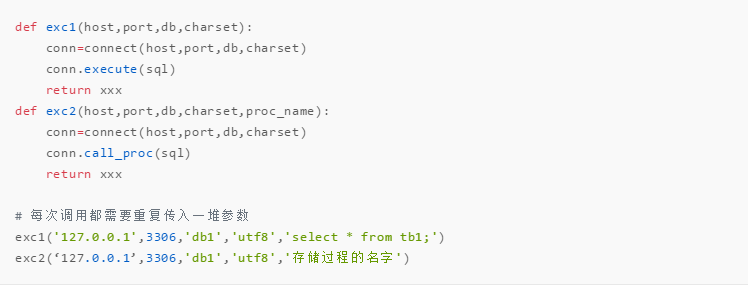

In [ ]:
class Exc1:
    def __init__(self,host,port,db,charset):
        self.host = host
        self.port = port
        self.db = db
        self.charset = charset
    def execute_sql(self,sql):
        conn = connect(self.host,self.port,self.db,self,charset)
        conn.execute(sql)
        return xxx
class Exc2(Exc1):
    def __init__(self,host,port,db,charset,proc_name):
        super().__init__(host,port,db,charset)
        self.proc_name = proc_name

exc1=Exc1('127.0.0.1',3306,'db1','utf8')   
exc1.execute_sql('select * from tb1')
exc2=Exc2('127.0.0.1',3306,'db1','utf8','存储过程的名字')
exc2.execute_sql('select * from tb1')

三 代码解释


不运行程序看代码说出代码运行结果并解释  
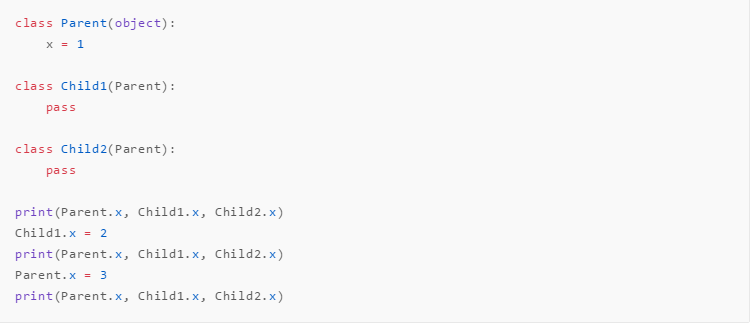

In [ ]:
1 1 1
1 2 1
3 2 3

In [7]:
class Parent():
    x=1
class Child1(Parent):
    pass
class Child2(Parent):
    pass
print(Parent.x, Child1.x, Child2.x)
Child1.x = 2
print(Parent.x, Child1.x, Child2.x)
Parent.x =3
print(Parent.x, Child1.x, Child2.x)

1 1 1
1 2 1
3 2 3


四 程序设计


1. 使用组合与继承设计一个学生选择课程的程序，使老师和学生初始化都具有课程属性，但是属性值为空，可以动态添加，  
   可打印出老师教授的的课程和学生学习的课程，  
   可以打印出课程名字和价格，  
   尽量避免写重复代码（提示：学生和老师都是属于人，都有课程属性）

In [61]:
class Course:
    def __init__(self,course_info):
        self.course_info = course_info
        print(self.course_info)
    def show_current_course(self,course):
        for c in course:
            print('课程{} 价格{}'.format(c,self.course_info[c]))
        
class People:
    def __init__(self,name,age,gender):
        self.name = name 
        self.age = age
        self.gender = gender
        self.course=[]
    def add_course(self,course):
        self.course.append(course)
class Teacher(People):  
    def add_course(self,course):
        super().add_course(course)
        print('老师当前在教的课程{}'.format(self.course))
class Student(People):     
    def add_course(self,course):
        super().add_course(course)     
        print('学生当前在学的课程{}'.format(self.course))


In [62]:
c=Course({'Python':1000,'Java':800,'C++':600})
t1 = Teacher('M','35','male')
t1.add_course('Python')
t1.add_course('Java')
t1.add_course('C++')
t1.course_info = c
t1.course_info.show_current_course(t1.course)

s1 = Student('sheldon','18','male')
s1.add_course('Python')



{'Python': 1000, 'Java': 800, 'C++': 600}
老师当前在教的课程['Python']
老师当前在教的课程['Python', 'Java']
老师当前在教的课程['Python', 'Java', 'C++']
课程Python 价格1000
课程Java 价格800
课程C++ 价格600
学生当前在学的课程['Python']


2. 使用多肽与封装设计一个虚拟宠物的程序
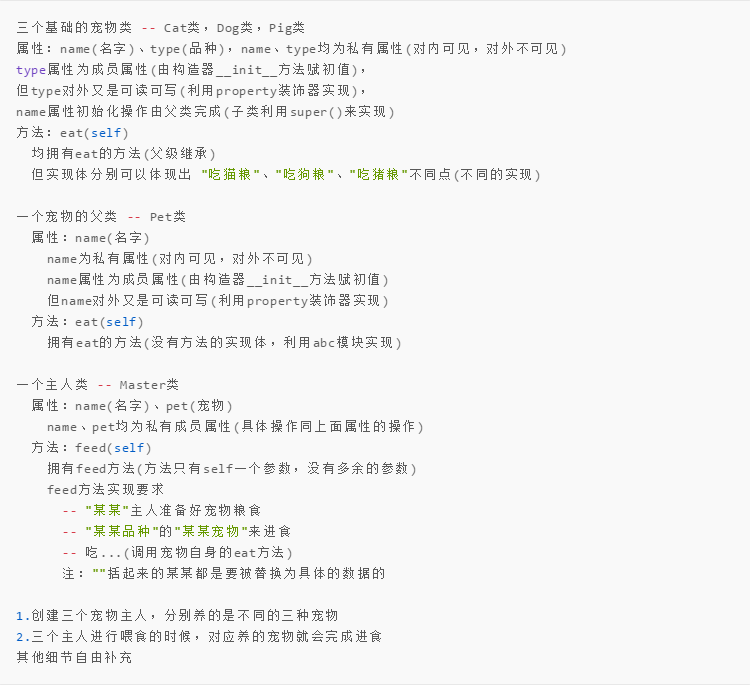

In [24]:
import abc
#实现宠物父类
class Pet(metaclass=abc.ABCMeta):
    def __init__(self,name):
        self.__name = name #封装name属性
    #使用property装饰器实现name属性外部访问
    @property
    def name(self):
        return self.__name
    #修改name
    @name.setter
    def name(self,new_name):
        self.__name = new_name   
    @abc.abstractmethod
    def eat(self):
        pass
    
#宠物子类 cat
class Cat(Pet):
    def __init__(self,name,ptype):
        super().__init__(name)
        self.__ptype = ptype
    @property
    def ptype(self):
        return self.__ptype
    @ptype.setter
    def ptype(self,new_ptype):
        self.__ptype = new_ptype
    def eat(self):
        print('吃鱼')
#宠物子类 Dog
class Dog(Pet):
    def __init__(self,name,ptype):
        super().__init__(name)
        self.__ptype = ptype
    @property
    def ptype(self):
        return self.__ptype
    @ptype.setter
    def ptype(self,new_ptype):
        self.__ptype = new_ptype
    def eat(self):
        print('吃骨头') 
#宠物子类 Pig
class Pig(Pet):
    def __init__(self,name,ptype):
        super().__init__(name)
        self.__ptype = ptype
    @property
    def ptype(self):
        return self.__ptype
    @ptype.setter
    def ptype(self,new_ptype):
        self.__ptype = new_ptype
    def eat(self):
        print('吃猪食')  
        
#主人类
class Master:
    def __init__(self,name,pet):
        self.__name = name
        self.__pet = pet
    def feed(self):
        print('{} 主人准备好宠粮'.format(self.__name))
        print('{} 的 {} 来进食'.format(self.__pet.ptype,self.__pet.name))
        self.__pet.eat()

In [25]:
cat1 = Cat('小猫','逞罗猫')
dog1 = Dog('小黑','牧羊犬')
pig1 = Pig('小白','苏格兰打卤猪')
m1 = Master('Albert',cat1)
m2 = Master('James',dog1)
m3 = Master('Elina',pig1)

In [30]:
m1.feed()
print(''.center(50,'='))
m2.feed()
print(''.center(50,'='))
m3.feed()


Albert 主人准备好宠粮
逞罗猫 的 小猫 来进食
吃鱼
James 主人准备好宠粮
牧羊犬 的 小黑 来进食
吃骨头
Elina 主人准备好宠粮
苏格兰打卤猪 的 小白 来进食
吃猪食
